In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
x=df.iloc[:,[2,3]].values

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

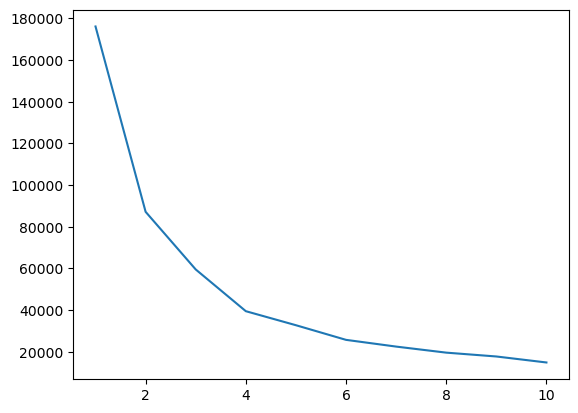

In [14]:
plt.plot(range(1,11),wcss);

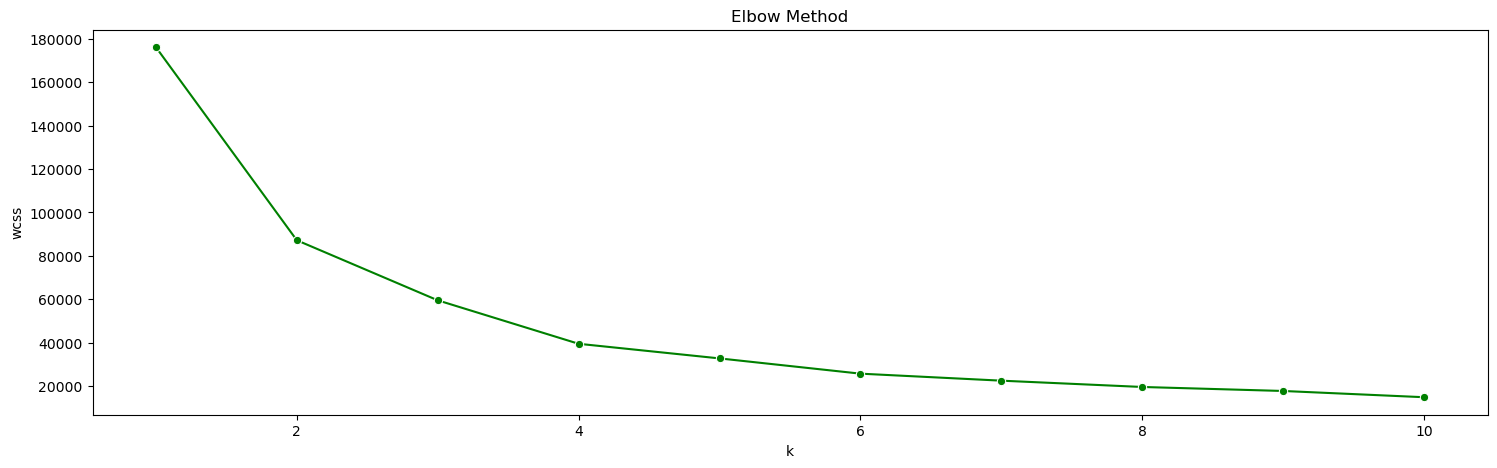

In [15]:
plt.figure(figsize=(18,5))
sns.lineplot(x=range(1,11),y=wcss,marker='o',color='g')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show();

In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [17]:
y_kmeans=kmeans.fit_predict(x)

plt.figure(figsize=(15,7))

sns.scatterplot(x[y_kmeans==0,0],x[y_kmeans==0,1],color='yellow',label='Cluster1',s=50)
sns.scatterplot(x[y_kmeans==1,0],x[y_kmeans==1,1],color='blue',label='Cluster2',s=50)
sns.scatterplot(x[y_kmeans==2,0],x[y_kmeans==2,1],color='green',label='Cluster3',s=50)
sns.scatterplot(x[y_kmeans==3,0],x[y_kmeans==3,1],color='grey',label='Cluster4',s=50)
sns.scatterplot(x[y_kmeans==4,0],x[y_kmeans==4,1],color='orange',label='Cluster5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:,0],
                kmeans.cluster_centers_[:,1],
                color='red',
                label='Centroids',
                s=300,
                marker=',')
plt.grid(False),
plt.title('Müsteri'),
plt.xlabel('kazanç'),
plt.ylabel('Harcama'),
plt.legend(),
plt.show()

Buraya bir daha bak!!!!!!

MVK İle

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Amerikadaki çeşitli eyaletleri işlenen suçlara göre segmente etmek istiyoruz buna bağlı olarak karar almak istiyoruz.Segmentlere ayırıp politika geliştirmek lazım.İş bilgisi çok önemli uzman görüşü alınması faydalıdır.

In [3]:
df=pd.read_csv('USArrests.csv').copy()

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Murder -> cinayet, assault -> saldırı, urbanpop -> nüfus, rape -> taciz,tecavüz 

In [5]:
df.index=df.iloc[:,0]

In [6]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [7]:
df=df.iloc[:,1:]

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
df.index.name=None

In [10]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [12]:
df.isnull().values.any()

False

In [13]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


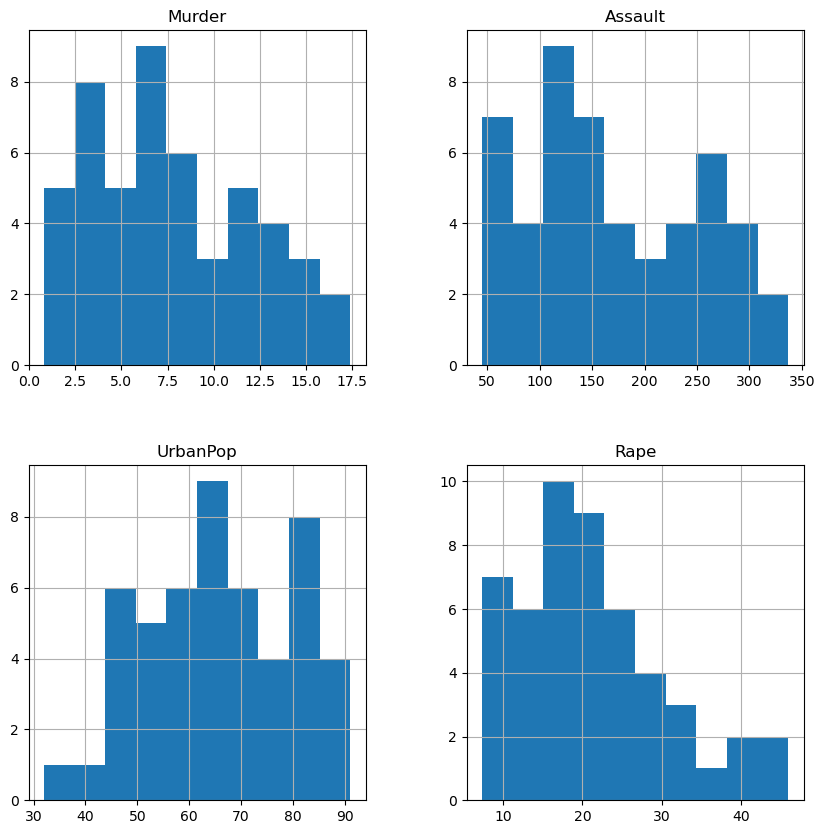

In [15]:
df.hist(figsize=(10,10));

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans=KMeans(n_clusters=4)

In [18]:
kmeans.fit(df)

KMeans(n_clusters=4)

In [19]:
kmeans.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [20]:
kmeans.n_clusters

4

In [21]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
       2, 0, 0, 2, 2, 0])

In [22]:
#görselleştirme

In [23]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [24]:
kumeler=kmeans.labels_

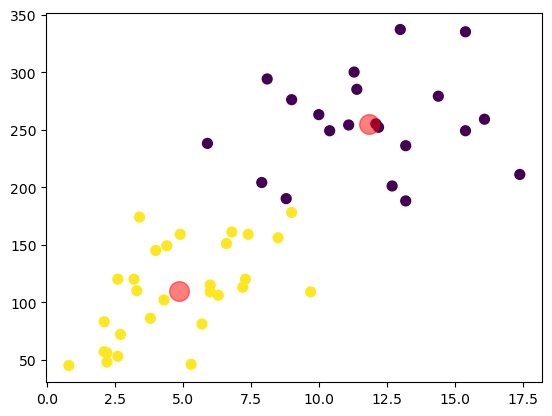

In [25]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap='viridis');
merkezler=kmeans.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1],c="red",s=200,alpha=0.5);

In [29]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [30]:
kumeler=kmeans.labels_
merkezler=kmeans.cluster_centers_

In [31]:
from mpl_toolkits.mplot3d import Axes3D

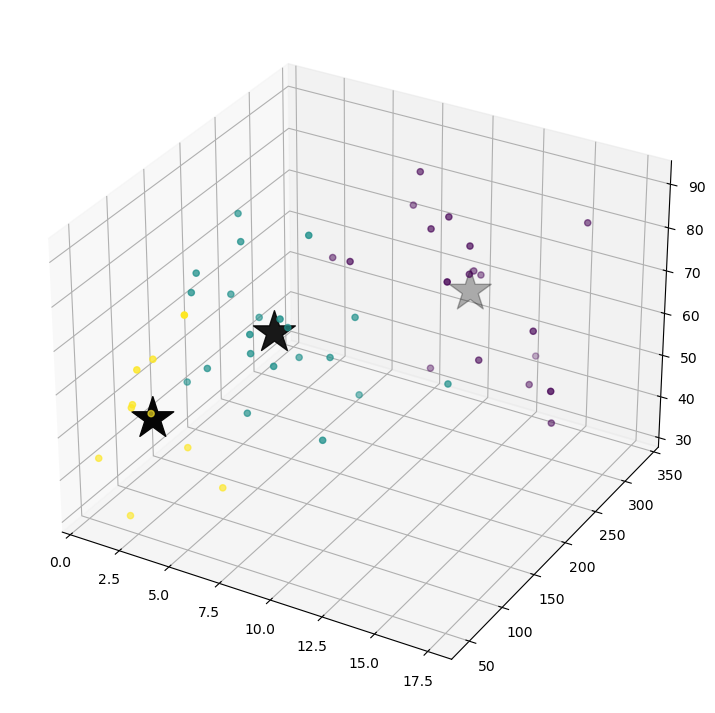

In [32]:
fig = plt.figure(figsize = (16,9))

ax = plt.axes(projection="3d")

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],c=kumeler)

ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],

           marker='*',
           
           c='#050505',

           s=1000);

In [33]:
#kümeler ve gözlem numaralarını kümelerde verme

In [34]:
sonuc=pd.DataFrame({"Eyaletler":df.index,"Kümeler":kumeler})

In [35]:
sonuc.head()

,Eyaletler,Kümeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0


In [37]:
#Elbow Method

In [38]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [39]:
from yellowbrick.cluster import KElbowVisualizer

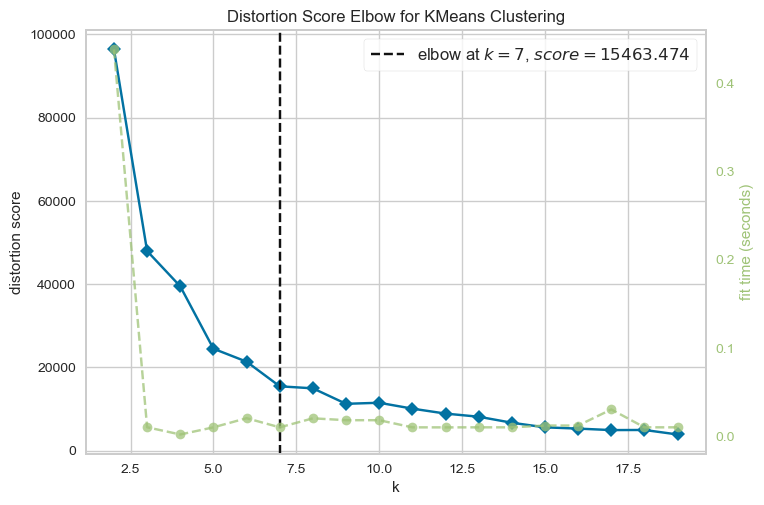

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,20))
visualizer.fit(df)
visualizer.poof()

In [46]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [47]:
sonuçlar=pd.DataFrame({'Eyaletler':df.index,'kümeler':kmeans.labels_})

In [48]:
sonuçlar.head()

,Eyaletler,kümeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1


In [49]:
df_=df.copy()

In [50]:
df_['Kümeler']=kmeans.labels_

In [51]:
df_.head()

,Murder,Assault,UrbanPop,Rape,Kümeler
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [85]:
df_[(df.Murder<7)&(df_.Assault<170)&(df_.Rape<21)]

,Murder,Assault,UrbanPop,Rape,Kümeler
Connecticut,3.3,110,77,11.1,3
Hawaii,5.3,46,83,20.2,0
Idaho,2.6,120,54,14.2,3
Iowa,2.2,56,57,11.3,0
Kansas,6.0,115,66,18.0,3
Maine,2.1,83,51,7.8,0
Massachusetts,4.4,149,85,16.3,2
Minnesota,2.7,72,66,14.9,0
Montana,6.0,109,53,16.4,3
Nebraska,4.3,102,62,16.5,3


In [95]:
df_[(df.Murder<7)&(df_.Assault<170)&(df_.Rape<21)]['Kümeler'].value_counts()

Kümeler
0    10
3     6
2     3
Name: count, dtype: int64

In [96]:
df_["Kümeler"].value_counts()

Kümeler
1    16
2    14
3    10
0    10
Name: count, dtype: int64

In [99]:
yeşil=df_[df_["Kümeler"]==0]

In [100]:
turuncu=df_[df_["Kümeler"]==3]

In [101]:
sarı=df_[df_["Kümeler"]==2]

In [102]:
kırmızı=df_[df_["Kümeler"]==1]

In [104]:
kırmızı

,Murder,Assault,UrbanPop,Rape,Kümeler
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1
Maryland,11.3,300,67,27.8,1
Michigan,12.1,255,74,35.1,1


In [105]:
sarı

,Murder,Assault,UrbanPop,Rape,Kümeler
Arkansas,8.8,190,50,19.5,2
Colorado,7.9,204,78,38.7,2
Georgia,17.4,211,60,25.8,2
Massachusetts,4.4,149,85,16.3,2
Missouri,9.0,178,70,28.2,2
New Jersey,7.4,159,89,18.8,2
Oklahoma,6.6,151,68,20.0,2
Oregon,4.9,159,67,29.3,2
Rhode Island,3.4,174,87,8.3,2
Tennessee,13.2,188,59,26.9,2


In [106]:
turuncu

,Murder,Assault,UrbanPop,Rape,Kümeler
Connecticut,3.3,110,77,11.1,3
Idaho,2.6,120,54,14.2,3
Indiana,7.2,113,65,21.0,3
Kansas,6.0,115,66,18.0,3
Kentucky,9.7,109,52,16.3,3
Montana,6.0,109,53,16.4,3
Nebraska,4.3,102,62,16.5,3
Ohio,7.3,120,75,21.4,3
Pennsylvania,6.3,106,72,14.9,3
Utah,3.2,120,80,22.9,3


In [107]:
yeşil

,Murder,Assault,UrbanPop,Rape,Kümeler
Hawaii,5.3,46,83,20.2,0
Iowa,2.2,56,57,11.3,0
Maine,2.1,83,51,7.8,0
Minnesota,2.7,72,66,14.9,0
New Hampshire,2.1,57,56,9.5,0
North Dakota,0.8,45,44,7.3,0
South Dakota,3.8,86,45,12.8,0
Vermont,2.2,48,32,11.2,0
West Virginia,5.7,81,39,9.3,0
Wisconsin,2.6,53,66,10.8,0


## HİYERARŞİK KÜMELEME

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('USArrests.csv').copy()

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.index=df.iloc[:,0]

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
df.index.name=None

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.isnull().values.any()

False

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


C:\Users\90531\anaconda3\conda4\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


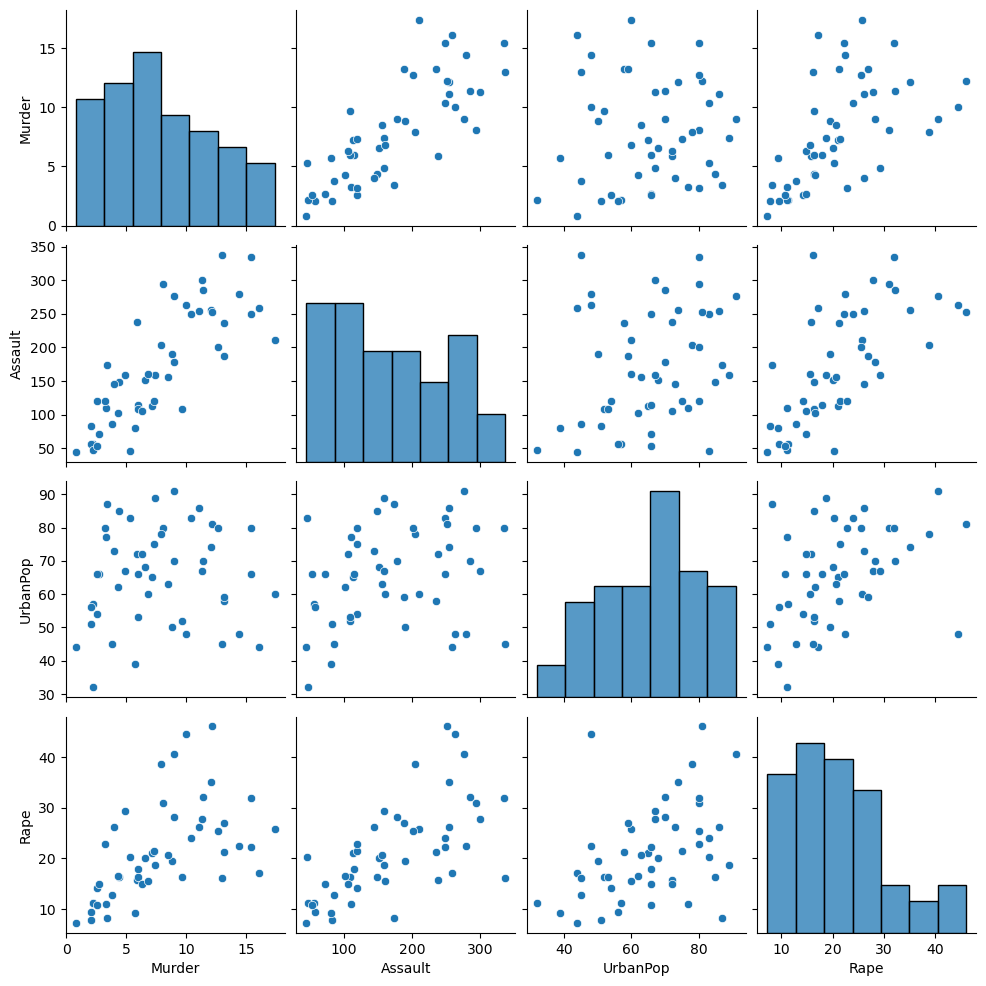

In [12]:
sns.pairplot(df);

In [13]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(df,"complete")
hc_average=linkage(df,"average")
hc_single=linkage(df,"single")

In [16]:
hc_complete

array([[ 14.        ,  28.        ,   2.29128785,   2.        ],
       [ 16.        ,  25.        ,   3.8340579 ,   2.        ],
       [ 13.        ,  15.        ,   3.92937654,   2.        ],
       [ 12.        ,  31.        ,   6.23698645,   2.        ],
       [ 34.        ,  43.        ,   6.63777071,   2.        ],
       [ 35.        ,  45.        ,   7.35527022,   2.        ],
       [  6.        ,  37.        ,   8.0274529 ,   2.        ],
       [ 18.        ,  40.        ,   8.53756406,   2.        ],
       [ 48.        ,  50.        ,  10.86001842,   3.        ],
       [ 20.        ,  29.        ,  11.45643924,   2.        ],
       [ 36.        ,  55.        ,  12.42497485,   3.        ],
       [  3.        ,  41.        ,  12.61427762,   2.        ],
       [ 47.        ,  57.        ,  12.77536692,   3.        ],
       [ 33.        ,  44.        ,  13.04492238,   2.        ],
       [ 21.        ,  27.        ,  13.29736816,   2.        ],
       [ 26.        ,  51

In [18]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_average,
           leaf_font_size=10);

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_single,
           leaf_font_size=10);

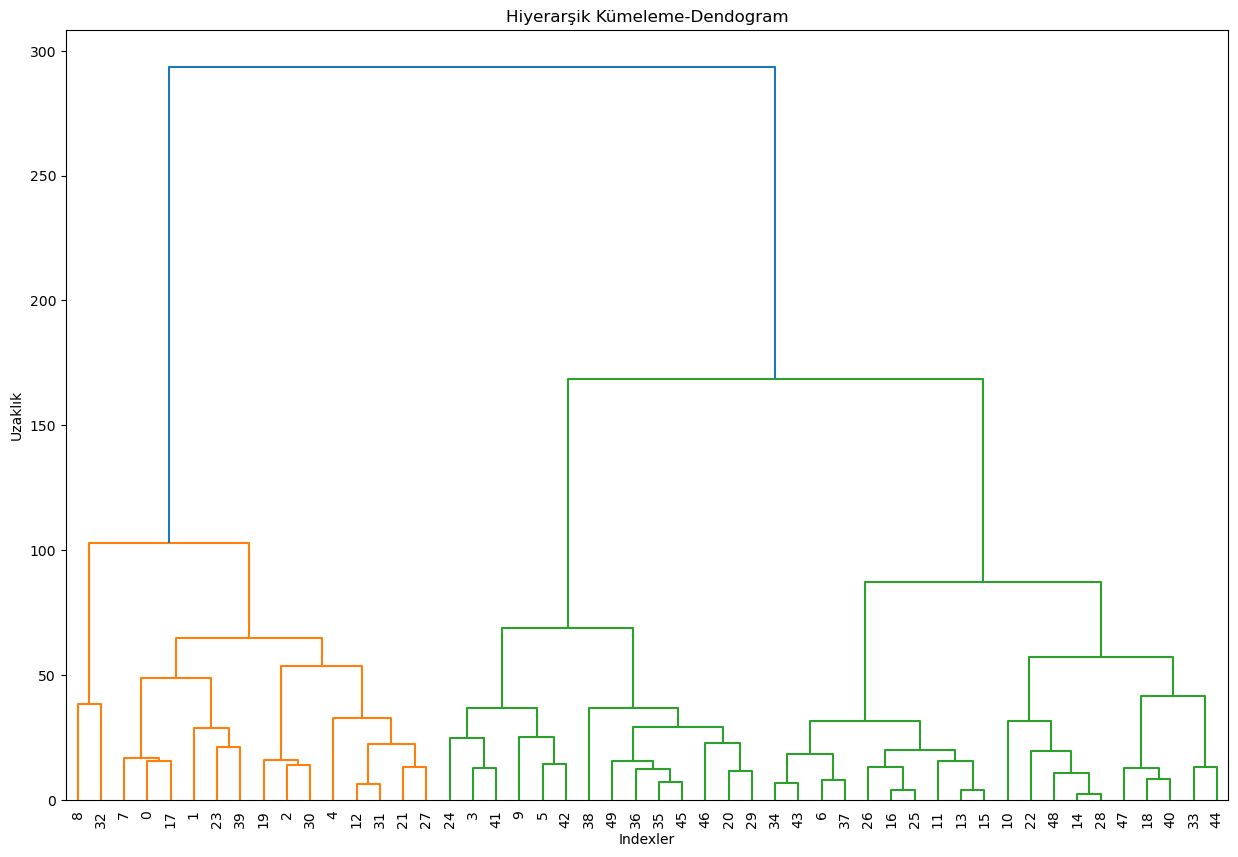

In [25]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme-Dendogram")
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete,
          leaf_font_size=10);

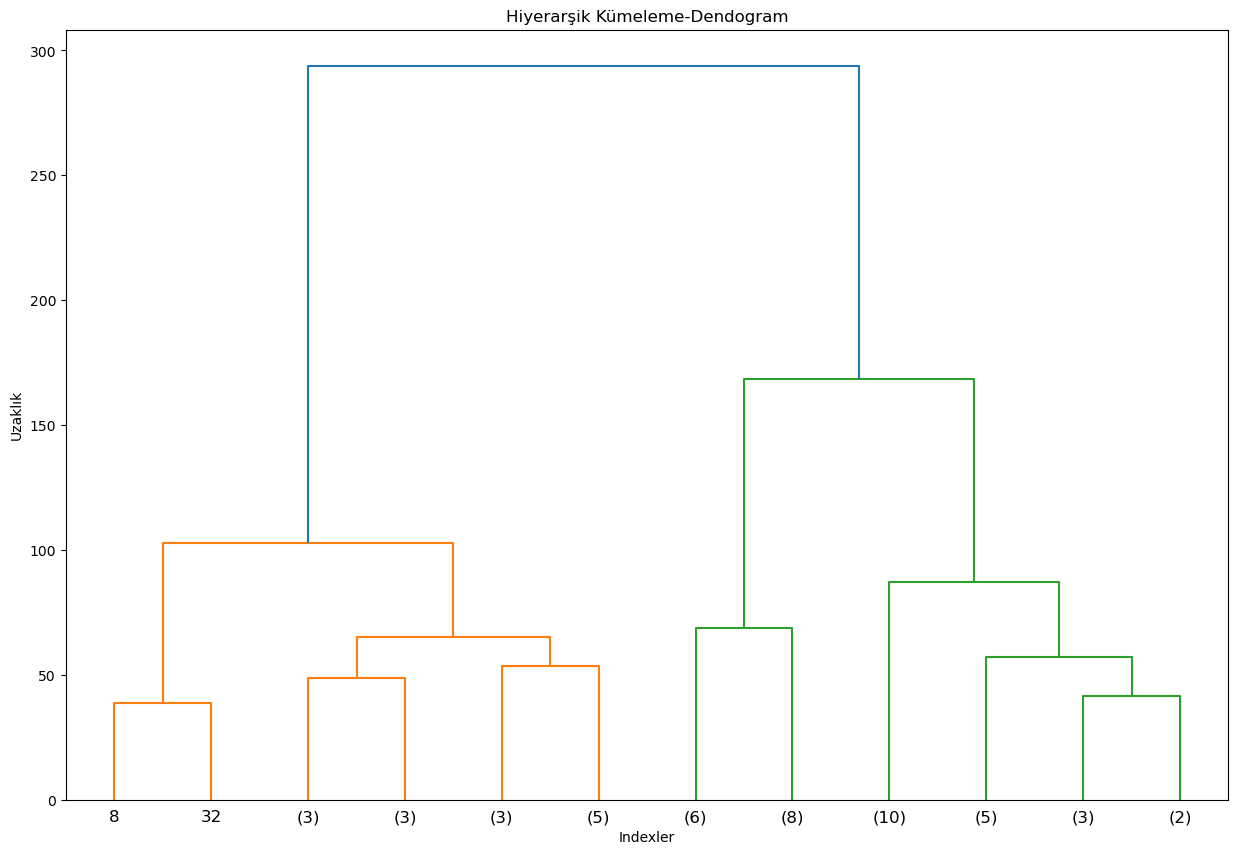

In [26]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete,
           truncate_mode='lastp',
           p=12);

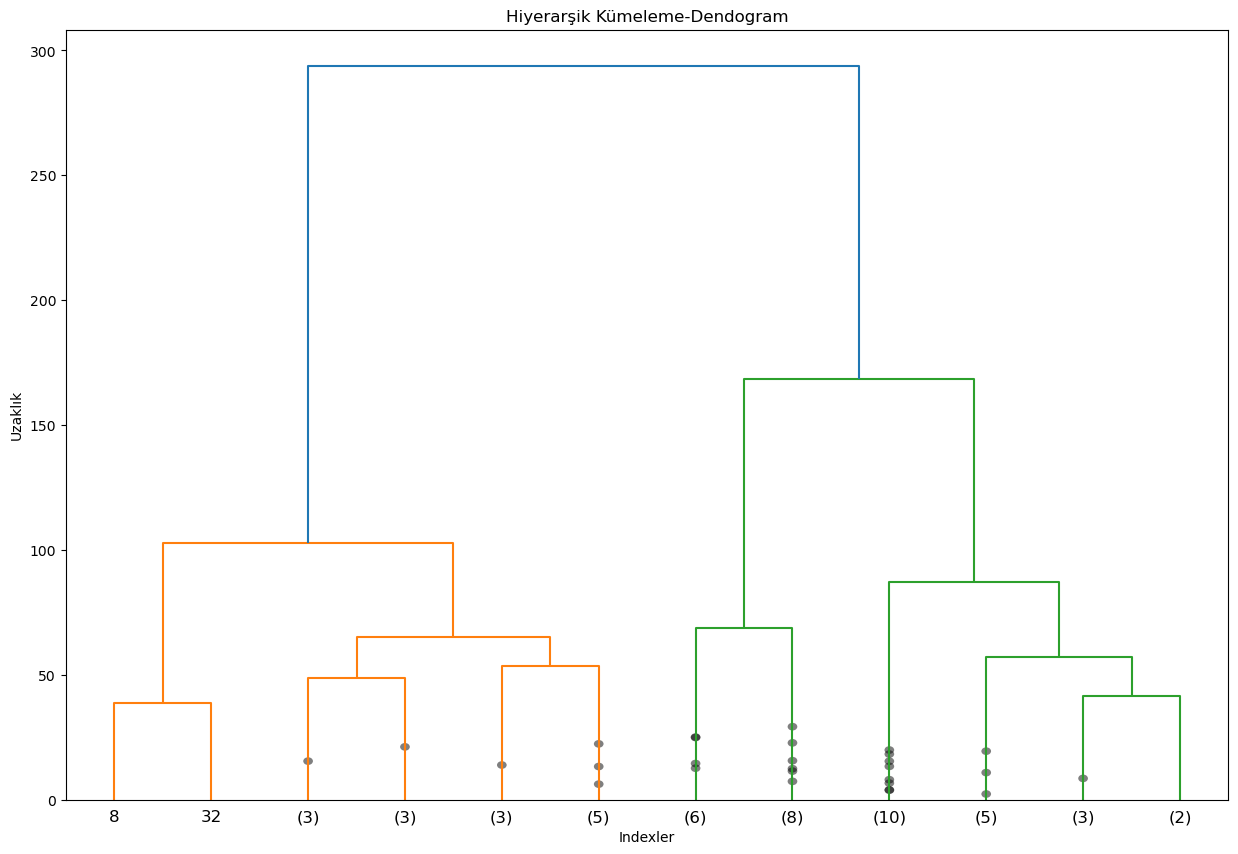

In [27]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete,
           truncate_mode='lastp',
           p=12,
           show_contracted=True);

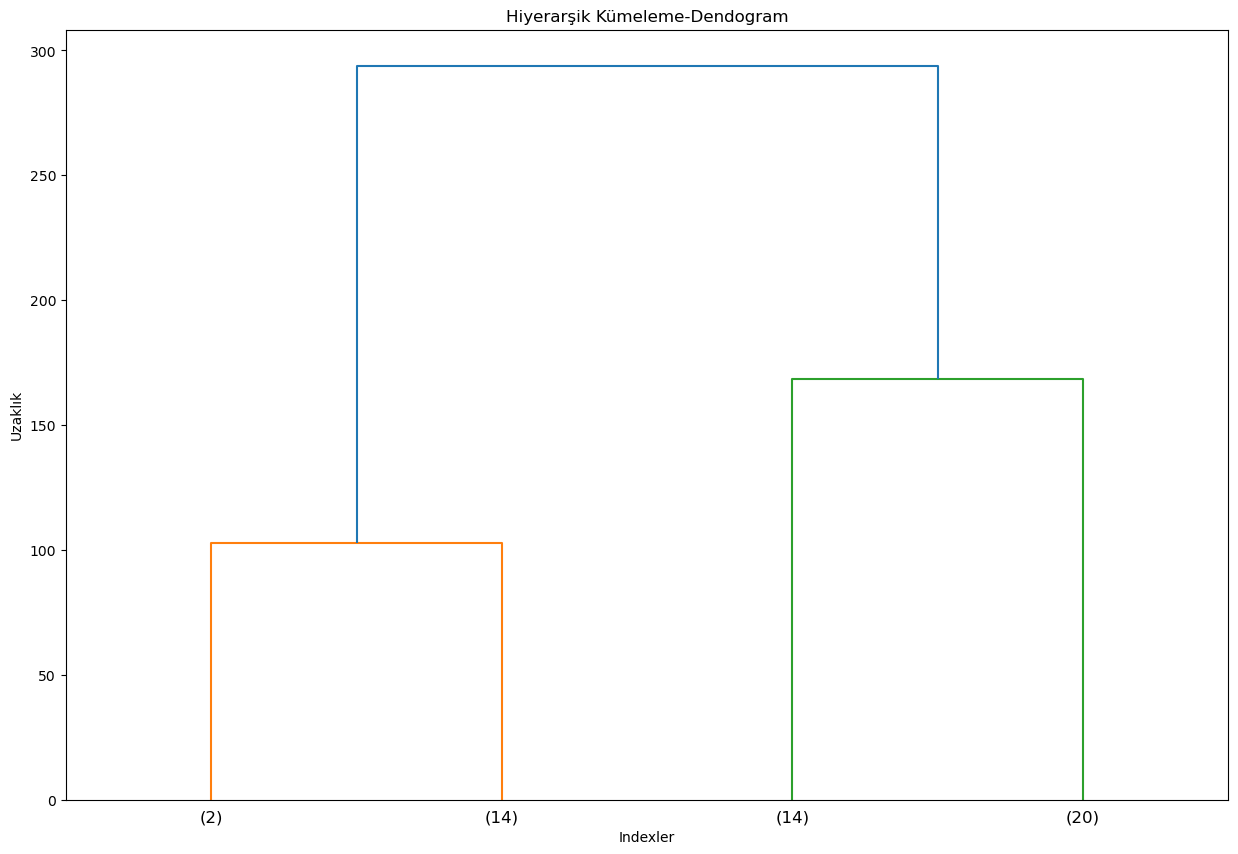

In [28]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete,
           truncate_mode='lastp',
           p=4);

## Optimum Küme Sayısı

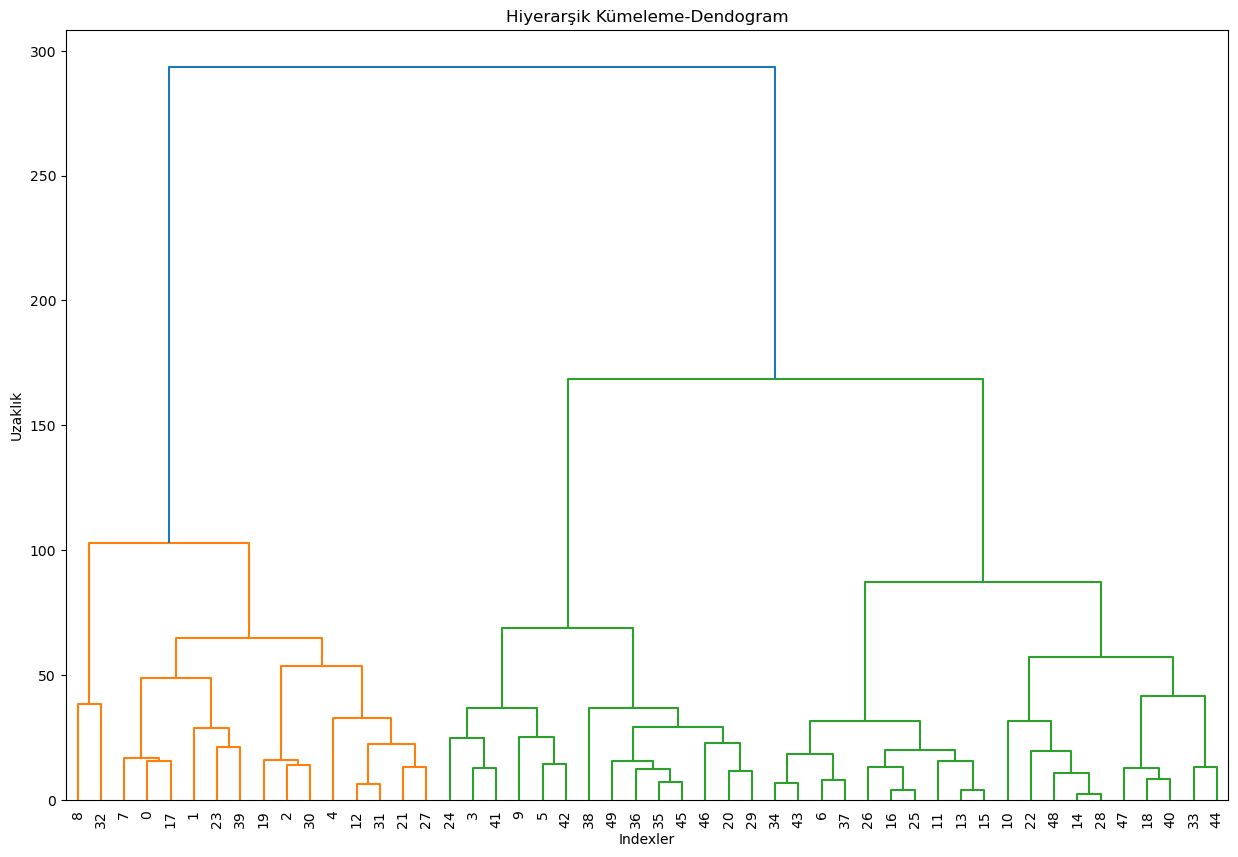

In [31]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete,
           leaf_font_size=10);

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,
                                metric='euclidean',
                                linkage='ward')
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [37]:
pd.DataFrame({'Eyaletler':df.index,'Kumeler': cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [38]:
df["kume_no"]=cluster.fit_predict(df)

In [39]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
